# Guided Project: Finding the Best Markets to Advertise In

## Introduction

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
pd.options.display.max_columns = 150 # to avoid truncated output 

In [4]:
df.shape

(18175, 136)

- 18,175 rows
- 136 columns

In [7]:
df.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
list(df.columns.values)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

## Checking for Sample Representativity

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

    Where are these new coders located.
    What are the locations with the greatest number of new coders.
    How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [17]:
# generate frequency distribution for `JobRoleInterest`
freq_interest = df['JobRoleInterest'].value_counts(normalize=True) * 100
print(freq_interest)

Full-Stack Web Developer                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                      2.030892
  Mobile Developer                                                                                                                                  

The table has many values - it's quite specific.
- Many people are interested in Web Development (Full-Stack Web Developer, Front-End Web Developer, Back-End Web Developer)
- A few are interested in Data Science (Data Scientist, Data Engineer)
- A few are interested in mobile development, game development, and security, as well as other domains.

It appears that people are interested in more than one domain, but we'll need to process a bit more to find out.

In [18]:
# split `JobRoleInterest` into multple columns
interests_no_nulls = df['JobRoleInterest'].dropna()
split_interests = interests_no_nulls.str.split(',')

# frequency table for number of interests per response
n_of_options = split_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

31.65% of respondents only listed one interest. The remaining 68.65% listed 2 or more interests.

While our interests are primarily web and mobile development, perhaps the mixed interests of respondents broadens our market a bit.

Let's hone in on web and mobile development.

In [23]:
# create frequency table of responses with Web or Mobile
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


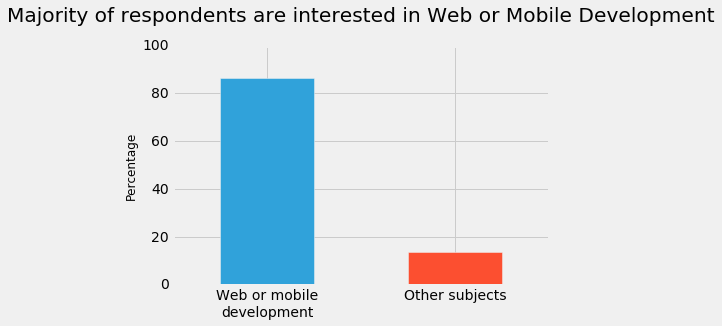

In [26]:
# create graph showing interest
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Majority of respondents are interested in Web or Mobile Development',
         y=1.08) # y pads the title higher
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1], ['Web or mobile\ndevelopment', 'Other subjects'],
           rotation=0)
plt.ylim([0,100])
plt.show()

Of those respondents who answered this question, 86.24% expressed an interest in web or mobile development. As a result, I'd say this sample is representative of the market we are trying to reach.

## New Coders - Locations and Densities

In [28]:
# drop rows where interest was null
df_no_interests = df[df['JobRoleInterest'].notnull()].copy()

In [30]:
# generate absolute and relative frequencies
absolute_freq = df_no_interests['CountryLive'].value_counts()
relative_freq = df_no_interests['CountryLive'].value_counts(normalize=True) * 100

# display frequency tables in dataframe
pd.DataFrame(data = {'Absolute Frequency': absolute_freq,
                    'Percentage': relative_freq})

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


After removing respondents who didn't indicate a job role interest, the country that shows the most promise is the USA (45.7%), followed by India (7.72%), the UK (4.61%) and Canada (3.80%).

The USA market is substantially larger than the next three. Also, we don't know how committed people are about their learning and how much they will spend.

## Spending Money for Learning

In [31]:
# replace 0 with 1 in `MonthsProgramming` column
df_no_interests['MonthsProgramming'].replace(0,1,inplace=True)

In [32]:
# create `MonthlySpend` column
df_no_interests['MonthlySpend'] = df_no_interests['MoneyForLearning'] / df_no_interests['MonthsProgramming']

In [33]:
# check for nulls
df_no_interests['MonthlySpend'].isnull().sum()

675

There are 675 respondents in this sample who don't have any money to spend, so we'll remove them.

In [34]:
# remove respondents with $0 to spend
df_no_interests = df_no_interests[df_no_interests['MonthlySpend'].notnull()]

In [35]:
# check `CountryLive` for nulls
df_no_interests['CountryLive'].isnull().sum()

105

In [36]:
# remove respondents with null country response
df_no_interests = df_no_interests[df_no_interests['CountryLive'].notnull()]

In [40]:
# confirm we still have enough data to analyze
df_no_interests['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [41]:
# group the results by our four countries of interest
countries_mean = df_no_interests.groupby(['CountryLive']).mean()
countries_mean['MonthlySpend'][['United States of America','India',
                               'United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlySpend, dtype: float64

It looks like the US and India are the two countries that have both the highest numbers of respondents as well as the highest average monthly spend per respondent.

That being said, the UK number looks suspiciously low. Also, based on GDP per capita, the UK and Canada would normally spend more than India. So it's possible our sample is misrepresentative or there are outliers skewing the results.

## Dealing with Extreme Outliers

In [42]:
# isolate 4 countries
only_4 = df_no_interests[df_no_interests['CountryLive']
                         .str.contains('United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



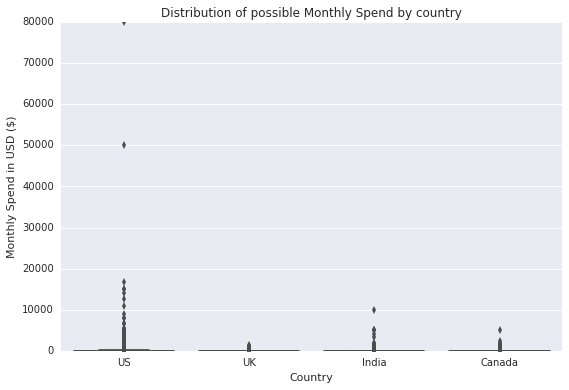

In [45]:
# box plots to visualize distributions
import seaborn as sns
sns.boxplot(x = 'CountryLive', y = 'MonthlySpend', data=only_4)
plt.title('Distribution of possible Monthly Spend by country')
plt.ylabel('Monthly Spend in USD ($)')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

The UK, India, and Canada all look normal.

In the US, however, there are two respondents that spent 50K and 80K, respectively, per month on learning. This seems unlikely perhaps a yearly amount was entered instead.

Let's remove those two.

In [50]:
# remove outliers
df_no_interests = df_no_interests[df_no_interests['MonthlySpend'] < 20000]

In [51]:
# recompute means
countries_means = df_no_interests.groupby(['CountryLive']).mean()
countries_means['MonthlySpend'][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlySpend, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



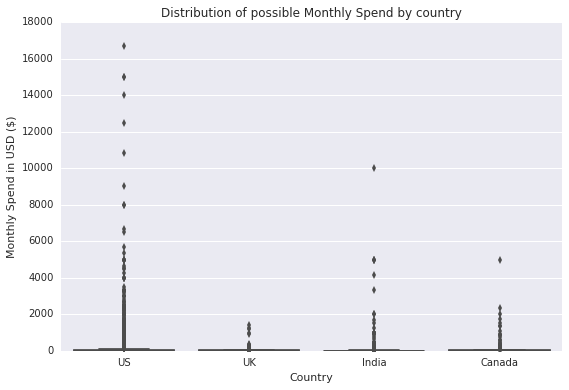

In [53]:
# isolate 4 countries
only_4 = df_no_interests[df_no_interests['CountryLive']
                         .str.contains('United States of America|India|United Kingdom|Canada')]

# box plots to visualize distributions
sns.boxplot(x = 'CountryLive', y = 'MonthlySpend', data=only_4)
plt.title('Distribution of possible Monthly Spend by country')
plt.ylabel('Monthly Spend in USD ($)')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

Looks like there are still quite a few outliers in the US and India, and one in Canada. So we'll have to investigate all of those.

In [56]:
# Inspect outliers in India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') &
    (only_4['MonthlySpend'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It appears that none of the participants attended a bootcamp, so it's hard to understand how the monthly spend is so much.

As a result, we will drop these responses since we have no way of knowing if they are accurate.

In [57]:
# drop India outliers
only_4 = only_4.drop(india_outliers.index)

There were also more outliers in the US

In [60]:
# isolate US outliers
usa_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['MonthlySpend'] >= 6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Of the 11 respondents in this subset, 6 did attend bootcamps, so their expenses do make sense. The remaining 5 did not and we will drop them.

8 of the respondents also had been programming for three months or less. In reality, their monthly spend is likely much lower as it was temporarily boosted to pay for months' long bootcamps programs.

Below, we will drop:
- those who did not attend bootcamps
- those who programmed for three months or less

In [61]:
# remove those who did not attend bootcamps
no_bootcamp = only_4[
    (only_4['CountryLive'] == "United States of America") &
    (only_4['MonthlySpend'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)]

only_4 = only_4.drop(no_bootcamp.index)

In [62]:
# remove those who programmed three months or less
low_experience = only_4[
    (only_4['CountryLive'] == 'United States of America') &
    (only_4['MonthlySpend'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)]

only_4 = only_4.drop(low_experience.index)

Finally, there is an outlier in Canada who pays more than $4000 per month for learning, so let's check that out.

In [63]:
# isolate Canadian outlier
canada_outlier = only_4[
    (only_4['CountryLive'] == 'Canada') &
    (only_4['MonthlySpend'] > 4000)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpend
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This outlier response also only had 2 months of programming, so I will drop this one as well

In [64]:
# remove Canadian who programmed three months or less
only_4 = only_4.drop(canada_outlier.index)

Once again, let's recompute the mean and box plots

In [65]:
# compute means
only_4.groupby(['CountryLive'])['MonthlySpend'].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MonthlySpend, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



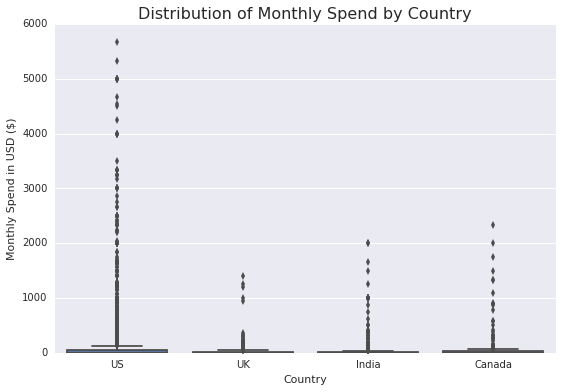

In [68]:
# draw boxplots
sns.boxplot(x='CountryLive', y='MonthlySpend', data=only_4)
plt.title('Distribution of Monthly Spend by Country', fontsize=16)
plt.ylabel('Monthly Spend in USD ($)')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

## Choosing the Two Best Markets

The United States is definitely the first choice to spend advertising money. Our subscriptions cost 59/month and the current average monthly spend by respondents there is 143/month.

On first glance, the second choice is Canada at 93/month. India is a bit more behind at 65/month but still greater than or 59/month price point. The UK is definitely out. So let's take another look at Canada and India.

In [69]:
# frequency table revisited
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Still not very clear here. India has twice as many respondents but Canada's respondents can spend more.

## Conclusion

So we have a few options here:

1. Split advertising expenses between US, India, and Canada (50% US, 30% India, 20% Canada) or some other suitable split
2. Split advertising between US and India or US and Canada
3. Spend in US only

Best course of action at this point seems to be to pass this off to Marketing and let them figure out the next step.

## Next Steps
You can also continue working on this project. Next steps include:

- Finding other criteria for choosing the best market.
- Analyzing other data sets:
    - [freeCodeCamp's 2016 New Coders Survey](https://github.com/freeCodeCamp/2016-new-coder-survey).
    - [Stack Overflow 2018 Developer Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey).
- Improving your project from a stylistical point of view by following the guidelines discussed [in this style guide](https://www.dataquest.io/blog/data-science-project-style-guide).